# Non-Text Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv')
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,kyl77,36-43,21 days ago,This blush is suppose to be a universally flat...,5.0,65%,4.1,4
1,1,Blush - Orgasm,ladyinred29,44-55,25 days ago,This blush is a beautiful color. It isn't ter...,3.0,65%,4.1,4
2,2,Blush - Orgasm,BougieAngel,30-35,a month ago,After purchasing this I didn't want to touch i...,4.0,65%,4.1,4
3,3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
4,4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4


In [3]:
print(products.shape)
print(products.info())

(10351, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
index         10351 non-null int64
product       10351 non-null object
user_id       10351 non-null object
age           10104 non-null object
date          10351 non-null object
review        10351 non-null object
ratings       10351 non-null float64
repurchase    10351 non-null object
packaging     10351 non-null float64
price         10351 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 808.8+ KB
None


In [4]:
# Check for presence of NaN values
products.isnull().sum()

index           0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [5]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

index         0
product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [6]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5332
Blush - Deep Throat    1165
Blush - Sin             766
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [7]:
products['user_id'].value_counts()
# Drop this feature because too many values but possible to explore if a user writing more reviews lead to higher likelihood of repurchasing

LayoverLifestyle    13
kathrynb23          12
JGardella           11
carrasco            10
ruby_tea_roses       9
izzybella            9
tenderheart003       9
Katie75007           8
GimpyPoop            8
stilagrrrl           8
syeung2              8
pakirani             8
trempot              7
LaciP504             7
Hothead              7
JessiDayle           7
bunny207             7
DanielleWilliams     7
sarahfeeni           7
Cygentte3            7
ashergill            7
pmnixa               7
MsPsylocke           7
delhi                6
yamyam               6
fabs162              6
sanrosee             6
Horny                6
Tigrou               6
cgw1                 6
                    ..
tr1gger              1
starsue1             1
primflower           1
codepink             1
MissLelly            1
sizza911             1
cdesla1              1
SaraLuvzMakeUp       1
ChaneLe              1
Spunky_Princess      1
productguru          1
Nailsonlychick       1
Meaninc    

In [8]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1337
12 years ago     1236
10 years ago     1117
13 years ago      880
17 years ago      759
16 years ago      719
9 years ago       699
14 years ago      697
15 years ago      673
18 years ago      633
8 years ago       542
7 years ago       336
6 years ago       228
5 years ago       141
19 years ago      132
4 years ago        81
3 years ago        48
2 years ago        34
20 years ago       25
a year ago         18
7 months ago        3
8 months ago        2
3 months ago        2
10 months ago       2
5 months ago        1
a month ago         1
21 days ago         1
2 months ago        1
9 months ago        1
25 days ago         1
6 months ago        1
Name: date, dtype: int64

In [9]:
products['price'].value_counts()
# Drop this feature because not useful

4    10351
Name: price, dtype: int64

In [10]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5563
4.0    2393
3.0    1403
2.0     673
1.0     319
Name: ratings, dtype: int64

In [11]:
products['age'].value_counts()

19-24        3994
25-29        2539
30-35        1601
36-43         873
Under 18      872
44-55         384
56 & Over      88
Name: age, dtype: int64

In [12]:
products['packaging'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

4.1    5581
4.2    2351
4.3    2109
4.4     310
Name: packaging, dtype: int64

In [13]:
products['repurchase'].value_counts()
# Convert to string since there are few numerical values so that we treat this as a categorical variable instead

65%    5332
79%    1490
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [14]:
# Convert numeric columns to categorical
products['ratings'] = products['ratings'].astype(str)
products['packaging'] = products['packaging'].astype(str)

# Check if they are converted correctly
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 10 columns):
index         10351 non-null int64
product       10351 non-null object
user_id       10351 non-null object
age           10351 non-null object
date          10351 non-null object
review        10351 non-null object
ratings       10351 non-null object
repurchase    10351 non-null object
packaging     10351 non-null object
price         10351 non-null int64
dtypes: int64(2), object(8)
memory usage: 808.8+ KB


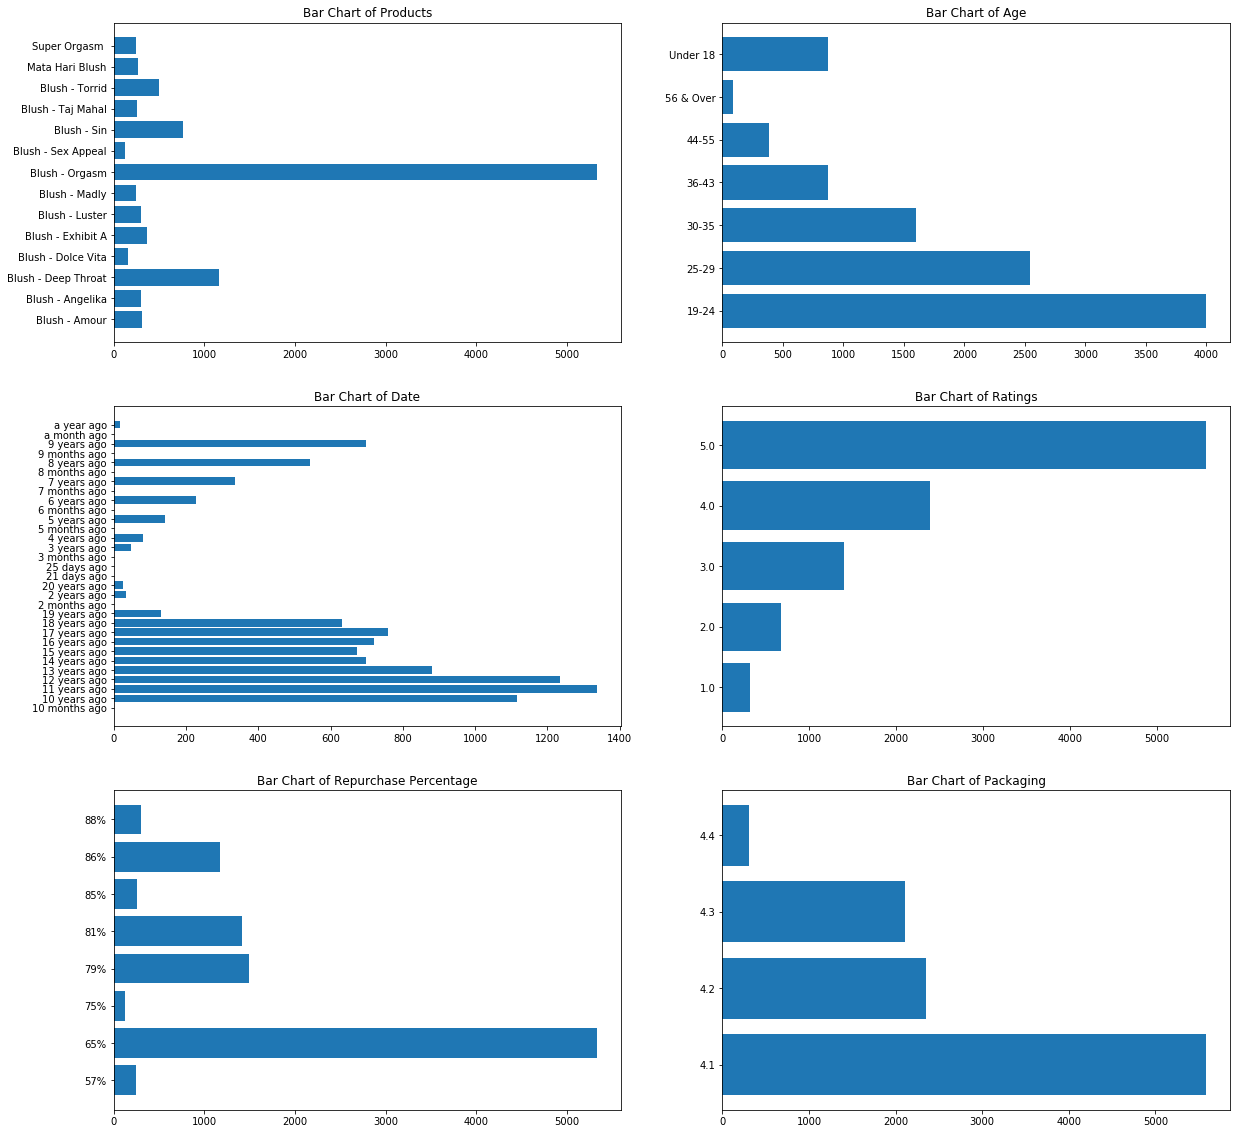

In [15]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].value_counts().sort_index().index,products['packaging'].value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [16]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [17]:
# Check for random sample of reviews
pd.set_option('display.max_colwidth', 200)
products['review'].sample(n=10)

6678                                                                                                        Quite frankly, this made me look like I had a sparkly bruised face!  At best it made me look dirty. 
8787     I kept passing this by because it just looked so very scary.. How could this possibly work i thought. Finally tried it out. Wow!! amazing. I have pale skin with yellow undertones and this works fo...
10032    My first NARS purchase was Orgasm and I got that almost 2 years ago. Finally went back to Sephora and spent a while trying to decide between DT and Torrid. I picked up DT and my date surprised me ...
6220     I am shocked I haven't reviewed Deep Throat yet!  This is a great everyday spring/summer blush with my coloring (PPP, some freckles, auburn hair, green hazel eyes).  I tend to think of it as my "n...
4719                                  This is a wonderful blush! Really great on my med-light skin. Love the shimmer and glow it gives me. Seems like these will las

count    10351.000000
mean       449.610859
std        348.451299
min          0.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64


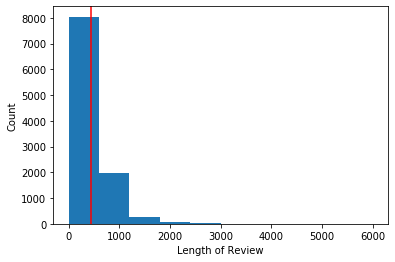

In [18]:
products['review_length'] = products['review'].apply(lambda x: len(x.strip()))

plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis

In [19]:
# Check for review with 0 length
products[products['review_length'] == 0]

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
466,696,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,0


In [20]:
# Remove the review 
products = products[products['review_length'] > 0]

In [21]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [22]:
products['english'].value_counts()

True     10326
False       24
Name: english, dtype: int64

In [23]:
# Check for random sample of Non-English reviews
products[products['english'] == False].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
4554,6830,Blush - Orgasm,DELILAHIZ1ST,19-24,16 years ago,"love the pink, makes me look i just had an orgasm.",5.0,65%,4.1,4,51,False
2919,4374,Blush - Orgasm,jalovette,30-35,12 years ago,Excellent colour,5.0,65%,4.1,4,16,False
512,767,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8,False
26,36,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9,False
3702,5552,Blush - Orgasm,beachbb,19-24,14 years ago,"HG! (MMM, NC20-30, blonde/green)",5.0,65%,4.1,4,32,False


In [24]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
10211,15333,Blush - Torrid,dustgirl,25-29,16 years ago,"Okay this is a gorgeous very pigmented shimmery coral-peach blush I'd never look at for myself, but the MA talked me into trying it on and I couldn't believe it looked good on me. I'm a cool-toned...",5.0,86%,4.2,4,462,True
10342,15529,Blush - Torrid,sarahlittlecutie,Under 18,18 years ago,"This is a product that has the most beautiful colour, more peachy than orgasm with less shimmer-only a teeny bit.\r\nApplied gently with a big fluffy brush made my w10 ppp skin look glowy and heal...",5.0,86%,4.2,4,520,True
786,1176,Blush - Orgasm,iqrakhan3,19-24,8 years ago,"Generally speaking I do quite like this product. It doesnt show up too much on my tan skin, so it looks like a slight blush with more highlight than actual colour. I tend to like this better, ho...",3.0,65%,4.1,4,320,True
974,1459,Blush - Orgasm,illamasquaFreak,19-24,9 years ago,"Well, though this is the most highly rated blush you will hear about from an artistry brand, I believe it to be highly overated. For a blush, 90 aud is just too much. you can get something from Il...",4.0,65%,4.1,4,556,True
8249,12386,Blush - Taj Mahal,deb2382,25-29,9 years ago,"Would never, ever have thought to buy or wear bright orange blush if it weren't for the glowing MUA reviews. So glad I bought into the hype! For reference, I am NC40-42 and this is a really lovely...",5.0,85%,4.2,4,526,True


In [25]:
# Drop Non-English reviews
products = products[products['english'] == True].drop(['english'], axis=1)

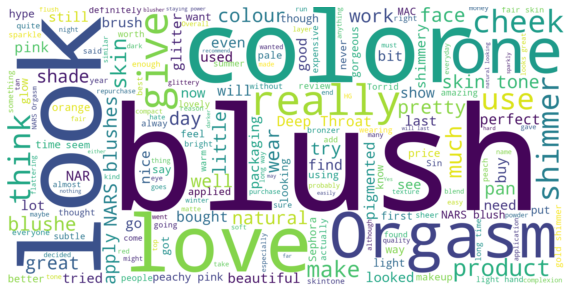

In [26]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

,word,occurences
1765,I,22402.0
3363,a,14085.0
3604,and,13446.0
10075,the,12494.0
6913,it,10857.0
6903,is,7792.0
10176,to,7740.0
10110,this,7296.0
4268,but,7020.0
7685,my,6583.0


# Non-Text Data Pre-processing

In [28]:
# Drop not useful columns
products.drop(columns=['index','price','user_id'], inplace=True)

In [29]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

In [30]:
# Check if the dates are formatted correctly
products['date'].value_counts()

-11    1336
-12    1234
-10    1115
-13     877
-9      699
-8      541
-7      332
-6      228
-5      140
-4       81
-3       48
-1       34
-2       32
Name: date, dtype: int64

In [31]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase_again'] = products['ratings'].apply(lambda x: 0 if float(x) < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

,product,age,date,review,repurchase,packaging,review_length,repurchase_again
0,Blush - Orgasm,36-43,-1,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",65%,4.1,565,1
1,Blush - Orgasm,44-55,-1,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",65%,4.1,574,0
2,Blush - Orgasm,30-35,-1,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",65%,4.1,331,1
3,Blush - Orgasm,44-55,-1,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",65%,4.1,893,1
4,Blush - Orgasm,30-35,-1,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,65%,4.1,331,1


In [32]:
products['repurchase_again'].value_counts()
# No need to account for class imbalance

1    5067
0    1630
Name: repurchase_again, dtype: int64

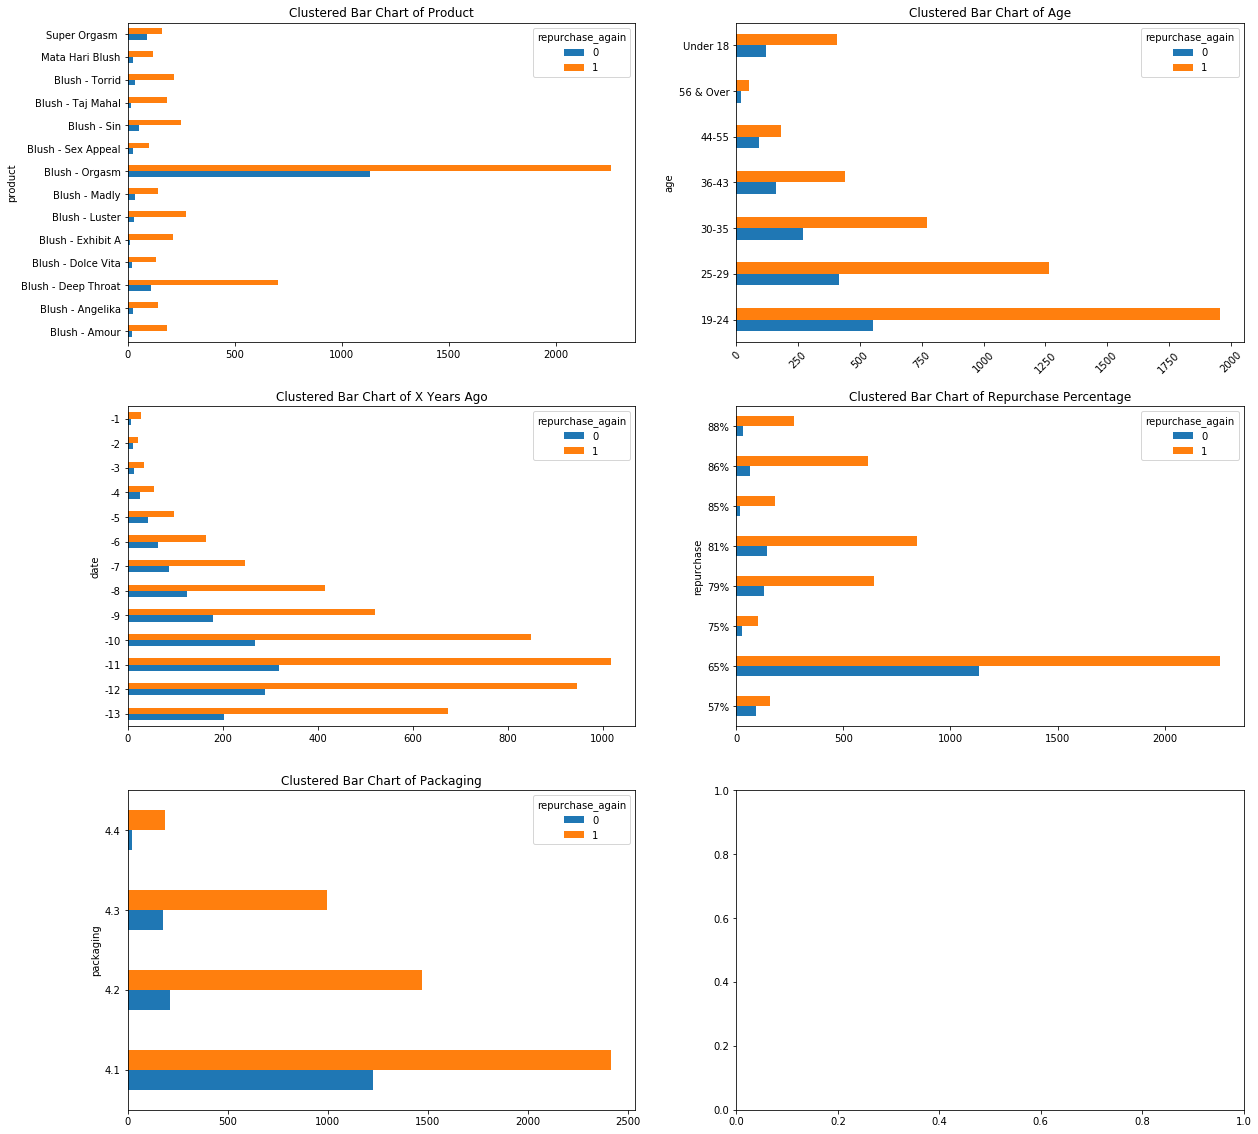

In [33]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))
products.groupby(['product','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,0])
ax[0,0].title.set_text('Clustered Bar Chart of Product')
ax[0,0].tick_params(axis='x', labelrotation=0)

products.groupby(['age','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[0,1])
ax[0,1].title.set_text('Clustered Bar Chart of Age')
ax[0,1].tick_params(axis='x', labelrotation=45)

products.groupby(['date','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,0])
ax[1,0].title.set_text('Clustered Bar Chart of X Years Ago')
ax[1,0].tick_params(axis='x', labelrotation=0)

products.groupby(['repurchase','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[1,1])
ax[1,1].title.set_text('Clustered Bar Chart of Repurchase Percentage')
ax[1,1].tick_params(axis='x', labelrotation=0)

products.groupby(['packaging','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax[2,0])
ax[2,0].title.set_text('Clustered Bar Chart of Packaging')
ax[2,0].tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category
# 65% Repurchase Percentage, Blush - Orgasm and 4.1 Packaging Rating have a much higher proportion of those not willing to repurchase; should analyze these groups 

# Text Data Preprocessing

In [34]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob, Word

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# Remove line breaks
def remove_breaks(text):
  text = re.sub(r'\r', '', text)
  return re.sub(r'\n', '', text)

products['review_processed'] = products['review'].apply(lambda x: remove_breaks(x))

In [36]:
# Remove links
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

products['review_processed'] = products['review_processed'].apply(lambda x: remove_urls(x))

In [37]:
# Covert to lowercase
products['review_processed'] = products['review_processed'].apply(lambda x: x.lower())

In [38]:
# Expand Contractions
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Function to perform expansion of contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

products['review_processed'] = products['review_processed'].apply(lambda x : expand_contractions(x,contractions_dict))

In [39]:
# Remove punctuations
products['review_processed'] = products['review_processed'].str.replace('[^\w\s]','')

In [40]:
# Remove digits (including words that contain digits because makeup products)
products['review_processed'] = products['review_processed'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [41]:
# Lemmatization
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))

In [42]:
# Remove extra whitespaces
products['review_processed'] = products['review_processed'].apply(lambda x: x.strip())

In [43]:
# Check sample of preprocessed reviews
products[['review', 'review_processed']].sample(n=10)

,review,review_processed
5339,"I have this, madly and exhibit a and sex appeal. I wanted very different colors and tones in my collection. This looks better on me than orgasm. My bf had told me i looked sunburnt when i had this...",i have this madly and exhibit a and sex appeal i wanted very different color and tone in my collection this look better on me than orgasm my bf had told me i looked sunburnt when i had this on i d...
6741,"This color is unique in my opinion. I would describe it as a berry color with gold shimmer on my NW20 complexion. It is pigmented, as are all NARS blushes, so apply with a light hand or you will l...",this color is unique in my opinion i would describe it a a berry color with gold shimmer on my plexion it is pigmented a are all nars blush so apply with a light hand or you will look bruised i li...
1100,"HG!!! I own about five blushes that I really like. I never thought orgasm would be good for me because it's always been described as peachy or a bit orange, and I am cool toned. I also don't like ...",hg i own about five blush that i really like i never thought orgasm would be good for me because it is always been described a peachy or a bit orange and i am cool toned i also do not like glitter...
1276,"this blush was recommended to me by a sephora associate 7 years ago for my fair NC15 skintone, and i hae used it ever since! it has always been my HG blush, the peachy color is perfect for my warm...",this blush wa mended to me by a sephora associate year ago for my fair skintone and i hae used it ever since it ha always been my hg blush the peachy color is perfect for my warmneutral skintone...
173,Pros:\r\n1. Great pigmentation that suits a wide range of skin tone.\r\n2. Flattering rose gold works for light to dark skin.\r\n3. The shimmers are not too overpowering. The blush itself is very ...,great pigmentation that suit a wide range of skin flattering rose gold work for light to dark the shimmer are not too overpowering the blush itself is very finely milled the matte rubberized pa...
8331,"I love this blush. As most people have said it looks crazy scary in the pan, but on the skin with a light hand it is beautiful. I think it would look nice on most skin tones, it just depends on th...",i love this blush a most people have said it look crazy scary in the pan but on the skin with a light hand it is beautiful i think it would look nice on most skin tone it just depends on the appli...
5953,LOVE this shade. It's not too orange on me (like Orgasm). It has more peachy pink finish and has just the right amount of shimmer to make my skin GLOW! Love it!,love this shade it is not too orange on me like orgasm it ha more peachy pink finish and ha just the right amount of shimmer to make my skin glow love it
10056,I don't really like this blush that much. It just isn't the right color for my skin.,i do not really like this blush that much it just is not the right color for my skin
9570,"I LOVE this color. It's perfect for olive, neutral skin tones like my own. it's matt, so no sparkles. It's sheer, so you can control the application. \r\nVery finely milled Amour is a beautiful bl...",i love this color it is perfect for olive neutral skin tone like my own it is matt so no sparkle it is sheer so you can control the application very finely milled amour is a beautiful blush in an ...
5812,"LOVE THIS BLUSH! I wear this every day and it's literally the perfect shade! I think the best dupe for this could possibly be the blush in Milani's bronzer/blush duo in ""Sunset Duo"", it's very sim...",love this blush i wear this every day and it is literally the perfect shade i think the best dupe for this could possibly be the blush in milanis bronzerblush duo in sunset duo it is very similar


# Feature Engineering

In [44]:
from sklearn import preprocessing
from textblob import TextBlob

In [45]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [46]:
# Conduct Label Encoding for Packaging and Repurchase Percentage because they are ordinal data 
label_encoder = preprocessing.LabelEncoder()
products['packaging'] = label_encoder.fit_transform(products['packaging'])
products['repurchase'] = label_encoder.fit_transform(products['repurchase'])

In [47]:
# Create new features
products['polarity'] = products['review_processed'].apply(lambda x: TextBlob(x).sentiment.polarity)
products['subjectivity'] = products['review_processed'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
products['word_count'] = products['review_processed'].apply(lambda x: len(str(x).split(" ")))
products['char_count'] = products['review_processed'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
products['avg_word_length'] = products['char_count'] / products['word_count']

In [48]:
products.reset_index(inplace=True)

In [49]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6697 entries, 0 to 6696
Data columns (total 32 columns):
index                          6697 non-null int64
date                           6697 non-null int64
review                         6697 non-null object
repurchase                     6697 non-null int32
packaging                      6697 non-null int32
review_length                  6697 non-null int64
repurchase_again               6697 non-null int64
review_processed               6697 non-null object
product_Blush - Angelika       6697 non-null uint8
product_Blush - Deep Throat    6697 non-null uint8
product_Blush - Dolce Vita     6697 non-null uint8
product_Blush - Exhibit A      6697 non-null uint8
product_Blush - Luster         6697 non-null uint8
product_Blush - Madly          6697 non-null uint8
product_Blush - Orgasm         6697 non-null uint8
product_Blush - Sex Appeal     6697 non-null uint8
product_Blush - Sin            6697 non-null uint8
product_Blush - Taj Maha

In [50]:
print("5 Random Reviews with Highest Polarity:")
for index,review in enumerate(products.iloc[products['polarity'].sort_values(ascending=False)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Highest Subjectivity:")
for index,review in enumerate(products.iloc[products['subjectivity'].sort_values(ascending=False)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Highest Polarity:
Review 1:
 orgasm blush from nars is the best blush ever it work well on almost every skin tone it blend in well with bronzers and highlighter this is always in my makeup kit
Review 2:
 this is a very beautiful color i can just use it with every look i choose nars is now my fav blush brand
Review 3:
 my hg blush  awesome color i will purchase again
Review 4:
 the best blush ever
Review 5:
 perfect blush for me
5 Random Reviews with Highest Subjectivity:
Review 1:
 the perfect blush  yep  a close a i have found  simply beautiful
Review 2:
 over ratedthose who want a nice peachy glow  mac  mac melba this is  mac creamblush in ladyblushlike nars product packaging
Review 3:
 nice color but a bit too sparkly
Review 4:
 i have been using this blush for a while but gave it up for daywork usage after i saw the glitteryness in a window reflection it is a very pretty color i now use tarina tarantino dollskin in feather for work
Review 5:
 beautiful colorpe

In [51]:
print("5 Random Reviews with Lowest Polarity:")
for index,review in enumerate(products.iloc[products['polarity'].sort_values(ascending=True)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

print("5 Random Reviews with Lowest Subjectivity:")
for index,review in enumerate(products.iloc[products['subjectivity'].sort_values(ascending=True)[:5].index]['review_processed']):
  print('Review {}:\n'.format(index+1),review)

5 Random Reviews with Lowest Polarity:
Review 1:
 worst blush ever the sparkle are awful why doe nars insist on putting glitter in their blush
Review 2:
 worst ingredient ever
Review 3:
 horrible color if you have oily skin make you look soooo shiny  also glitter fall all over your face and the blush broke apart in my purse after like one week  glitter everywhere  hated it
Review 4:
 this blush showed up a dirty and dull on my  skin like some people have said it almost ha a bruise like effect horrible
Review 5:
 a much a i hate returning thing i am seriously contemplating this one i am very disappointed that the chunk of glitter do not break down a i had been told that they would the color is just okdefinately not a color i could not get from another le expensive blush i think the worst part is that the chunk of glitter ended up all over my face after a while i think i will stick to my lovejoy for now
5 Random Reviews with Lowest Subjectivity:
Review 1:
 overated and over priced it doe

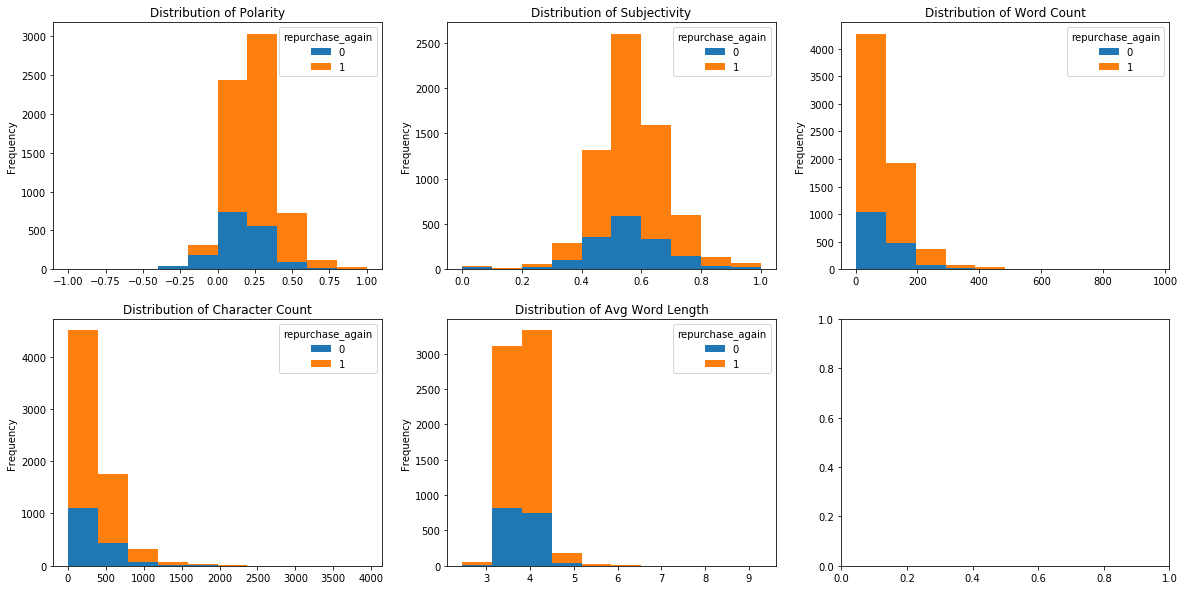

In [52]:
# Histogram of new features
fig, ax = plt.subplots(2,3,figsize=(20,10))
products.pivot(columns='repurchase_again').polarity.plot(kind = 'hist',stacked=True,ax=ax[0,0])
ax[0,0].title.set_text('Distribution of Polarity')
products.pivot(columns='repurchase_again').subjectivity.plot(kind = 'hist',stacked=True, ax=ax[0,1])
ax[0,1].title.set_text('Distribution of Subjectivity')
products.pivot(columns='repurchase_again').word_count.plot(kind = 'hist',stacked=True,ax=ax[0,2])
ax[0,2].title.set_text('Distribution of Word Count')
products.pivot(columns='repurchase_again').char_count.plot(kind = 'hist',stacked=True,ax=ax[1,0])
ax[1,0].title.set_text('Distribution of Character Count')
products.pivot(columns='repurchase_again').avg_word_length.plot(kind = 'hist',stacked=True,ax= ax[1,1])
ax[1,1].title.set_text('Distribution of Avg Word Length')

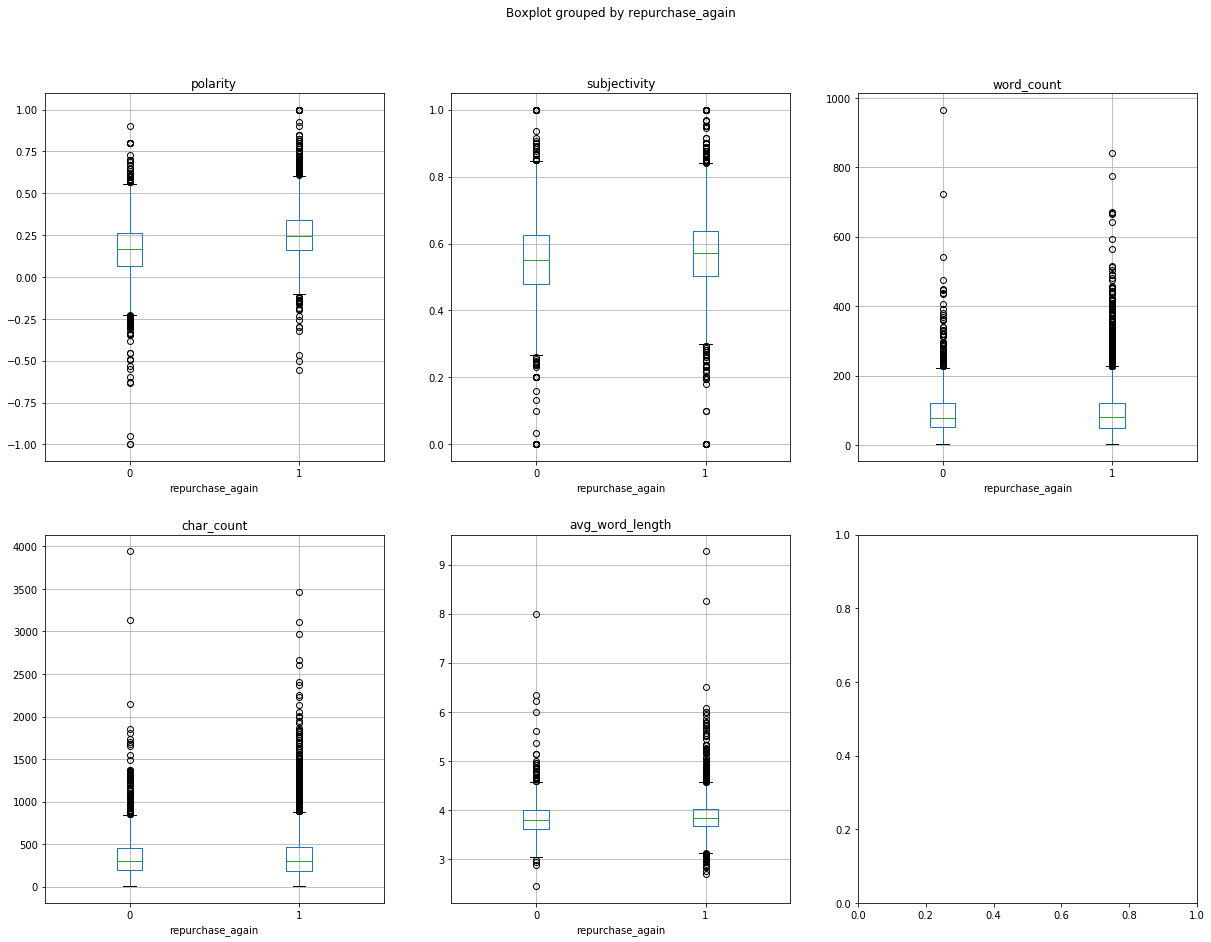

In [53]:
# Boxplot of new features
fig, ax = plt.subplots(2,3,figsize=(20,15))
products.boxplot('polarity',by='repurchase_again',ax=ax[0,0])
products.boxplot('subjectivity',by='repurchase_again',ax=ax[0,1])
products.boxplot('word_count',by='repurchase_again',ax=ax[0,2])
products.boxplot('char_count',by='repurchase_again',ax=ax[1,0])
products.boxplot('avg_word_length',by='repurchase_again',ax=ax[1,1])

# Those who repurchase again have higher polarity, higher subjectivity, similar word count, similar character count, higher average word length compared to those who don't repurchase again

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)